### Load libraries and dataframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
# file path
path = r'/Users/elliothaigh/Desktop/Data Analytics Course/Airlines Project'

In [3]:
# Load dataset
df = pd.read_pickle(os.path.join(path, '01 Data', 'flights_merged_categories.pkl'))

In [4]:
%matplotlib inline

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head(50)

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,ORIGIN_AIRPORT_CODE,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_AIRPORT_CODE,DESTINATION_AIRPORT,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_COUNTRY,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,DEPARTURE_DELAY_CATEGORY
0,2015,1,1,4,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
1,2015,1,1,4,45,41.0,-4.0,17.0,58.0,204.0,194.0,173.0,1448,451.0,4.0,509,455.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
2,2015,1,1,4,135,NaN,NaN,NaN,NaN,205.0,NaN,NaN,1448,NaN,NaN,600,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,NaN
3,2015,1,1,4,155,140.0,-15.0,17.0,157.0,218.0,198.0,170.0,1448,547.0,11.0,633,558.0,-35.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
4,2015,1,1,4,220,209.0,-11.0,15.0,224.0,200.0,199.0,176.0,1448,620.0,8.0,640,628.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
5,2015,1,1,4,505,457.0,-8.0,16.0,513.0,205.0,199.0,179.0,1448,912.0,4.0,930,916.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
6,2015,1,1,4,700,653.0,-7.0,16.0,709.0,210.0,202.0,179.0,1448,1108.0,7.0,1130,1115.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
7,2015,1,1,4,1035,1027.0,-8.0,21.0,1048.0,207.0,206.0,180.0,1448,1448.0,5.0,1502,1453.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
8,2015,1,1,4,1340,1330.0,-10.0,18.0,1348.0,195.0,195.0,171.0,1448,1739.0,6.0,1755,1745.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
9,2015,1,1,4,1430,1424.0,-6.0,7.0,1431.0,200.0,189.0,175.0,1448,1826.0,7.0,1850,1833.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure


### Cleaning

In [7]:
# remove all non numeric columns
selected_columns = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'TAXI_OUT', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'TAXI_IN', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
df_cluster = df[selected_columns]
 

In [8]:
# Check for missing values

df_cluster.isnull().sum()

MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
SCHEDULED_DEPARTURE          0
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
TAXI_IN                  92513
ARRIVAL_DELAY           105071
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [9]:
#Replace NaN in delay collumns with 0 to represent no delay.
columns_to_replace = ['ARRIVAL_DELAY','AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
df_cluster[columns_to_replace] = df_cluster[columns_to_replace].fillna(0)

/var/folders/zf/5wl5rbdx2sd06spmrq4nqtww0000gn/T/ipykernel_54412/1130788167.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster[columns_to_replace] = df_cluster[columns_to_replace].fillna(0)


In [10]:
# Check for missing values

df_cluster.isnull().sum()

MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
SCHEDULED_DEPARTURE         0
DEPARTURE_DELAY         86153
TAXI_OUT                89047
SCHEDULED_TIME              6
ELAPSED_TIME           105071
AIR_TIME               105071
DISTANCE                    0
TAXI_IN                 92513
ARRIVAL_DELAY               0
AIR_SYSTEM_DELAY            0
SECURITY_DELAY              0
AIRLINE_DELAY               0
LATE_AIRCRAFT_DELAY         0
WEATHER_DELAY               0
dtype: int64

In [11]:
# Remove values with NaN in AIR_TIME as these are cancelled flights and not relevant for our cluster analysis
df_cluster = df_cluster.dropna(subset=['AIR_TIME'])

In [12]:
# Check for missing values

df_cluster.isnull().sum()

MONTH                  0
DAY                    0
DAY_OF_WEEK            0
SCHEDULED_DEPARTURE    0
DEPARTURE_DELAY        0
TAXI_OUT               0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
TAXI_IN                0
ARRIVAL_DELAY          0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

In [13]:
df_cluster.head(50)

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,4,5,-11.0,21.0,205.0,194.0,169.0,1448,4.0,-22.0,0.0,0.0,0.0,0.0,0.0
1,1,1,4,45,-4.0,17.0,204.0,194.0,173.0,1448,4.0,-14.0,0.0,0.0,0.0,0.0,0.0
3,1,1,4,155,-15.0,17.0,218.0,198.0,170.0,1448,11.0,-35.0,0.0,0.0,0.0,0.0,0.0
4,1,1,4,220,-11.0,15.0,200.0,199.0,176.0,1448,8.0,-12.0,0.0,0.0,0.0,0.0,0.0
5,1,1,4,505,-8.0,16.0,205.0,199.0,179.0,1448,4.0,-14.0,0.0,0.0,0.0,0.0,0.0
6,1,1,4,700,-7.0,16.0,210.0,202.0,179.0,1448,7.0,-15.0,0.0,0.0,0.0,0.0,0.0
7,1,1,4,1035,-8.0,21.0,207.0,206.0,180.0,1448,5.0,-9.0,0.0,0.0,0.0,0.0,0.0
8,1,1,4,1340,-10.0,18.0,195.0,195.0,171.0,1448,6.0,-10.0,0.0,0.0,0.0,0.0,0.0
9,1,1,4,1430,-6.0,7.0,200.0,189.0,175.0,1448,7.0,-17.0,0.0,0.0,0.0,0.0,0.0
10,1,1,4,1615,-11.0,10.0,200.0,187.0,173.0,1448,4.0,-24.0,0.0,0.0,0.0,0.0,0.0


### Elbow technique to find number of clusters

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(df_cluster).score(df_cluster) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/elliothaigh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elliothaigh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elliothaigh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elliothaigh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

[-3570905627466.709,
 -2075514042437.358,
 -1282255547942.7698,
 -1012323241869.1111,
 -810514088286.2698,
 -696657438852.0243,
 -592150891383.1691,
 -518727594268.3325,
 -466324350618.37256]

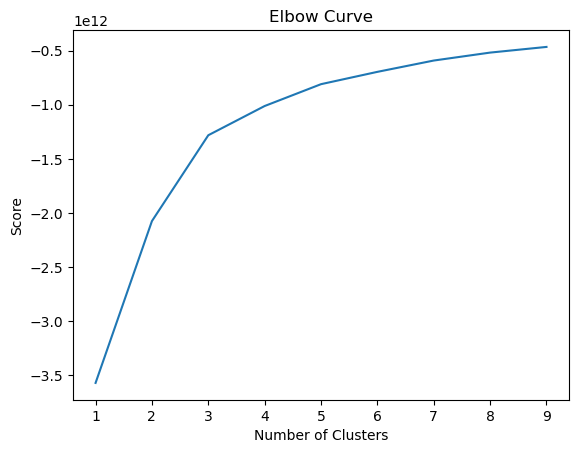

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

5 appears to be the best option for the number of clusters.

### K-means clustering

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [18]:
kmeans.fit(df_cluster)

/Users/elliothaigh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [19]:
df_cluster['CLUSTERS'] = kmeans.fit_predict(df_cluster)

/Users/elliothaigh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
df_cluster['CLUSTERS'].value_counts()

4    1769757
3    1532651
1     965266
2     948116
0     498218
Name: CLUSTERS, dtype: int64

### Cluster Analysis

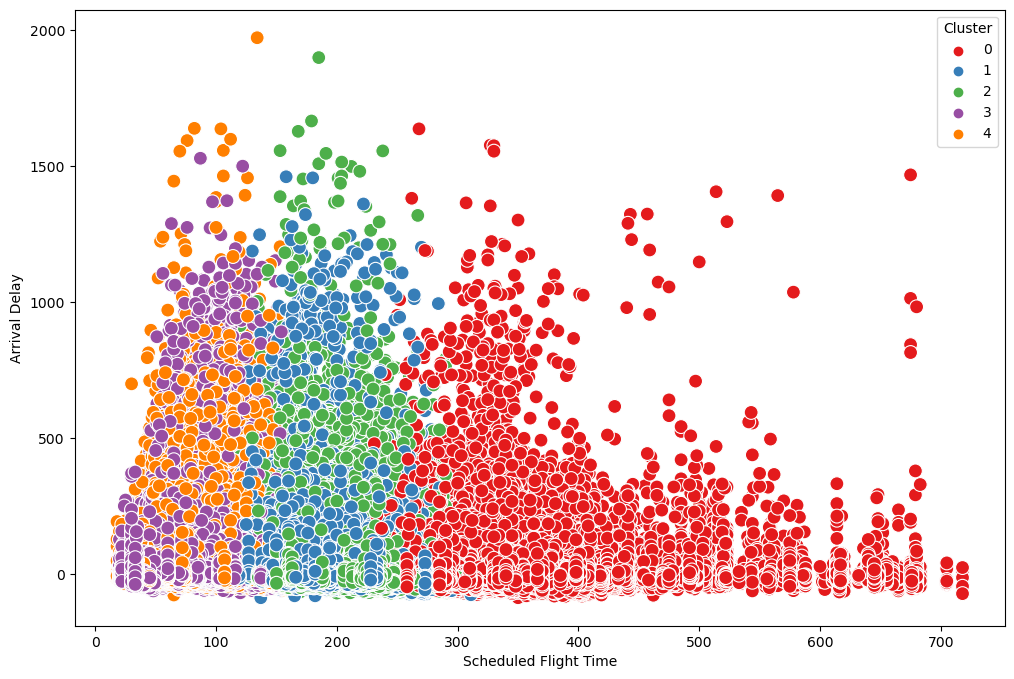

In [21]:
# Plot the clusters for the "Scheduled Time" and "Arrival Delay" variables.
plt.figure(figsize=(12, 8))

# Define a color palette for the clusters
cluster_palette = sns.color_palette("Set1", n_colors=len(df_cluster['CLUSTERS'].unique()))

ax = sns.scatterplot(
    x=df_cluster['SCHEDULED_TIME'],
    y=df_cluster['ARRIVAL_DELAY'],
    hue=df_cluster['CLUSTERS'], 
    palette=cluster_palette,
    s=100
)

ax.grid(False)
plt.xlabel('Scheduled Flight Time')
plt.ylabel('Arrival Delay')
plt.legend(title='Cluster')
plt.show()

Here we can see the 5 different cluster groups and how they are dispersed among the scheduled flight time and arrival delay scapperplot. This scatterplot does a fairly good job of identifying characteristics that the clusters have in common. We can see the pruple cluster is very much grouped towards the right of the graph indicating that they are longer flights. The blue and orange flights are the shortest flights and it appears as though the blue cluster have a higher prevenlence of long arrival delays. The red and green clusters have medium length flights with the red flights seemingly having higher arrival delays.

In [22]:
df_cluster.loc[df_cluster['CLUSTERS'] == 4, 'cluster'] = 'orange'
df_cluster.loc[df_cluster['CLUSTERS'] == 3, 'cluster'] = 'purple'
df_cluster.loc[df_cluster['CLUSTERS'] == 2, 'cluster'] = 'green'
df_cluster.loc[df_cluster['CLUSTERS'] == 1, 'cluster'] = 'blue'
df_cluster.loc[df_cluster['CLUSTERS'] == 0, 'cluster'] = 'red'

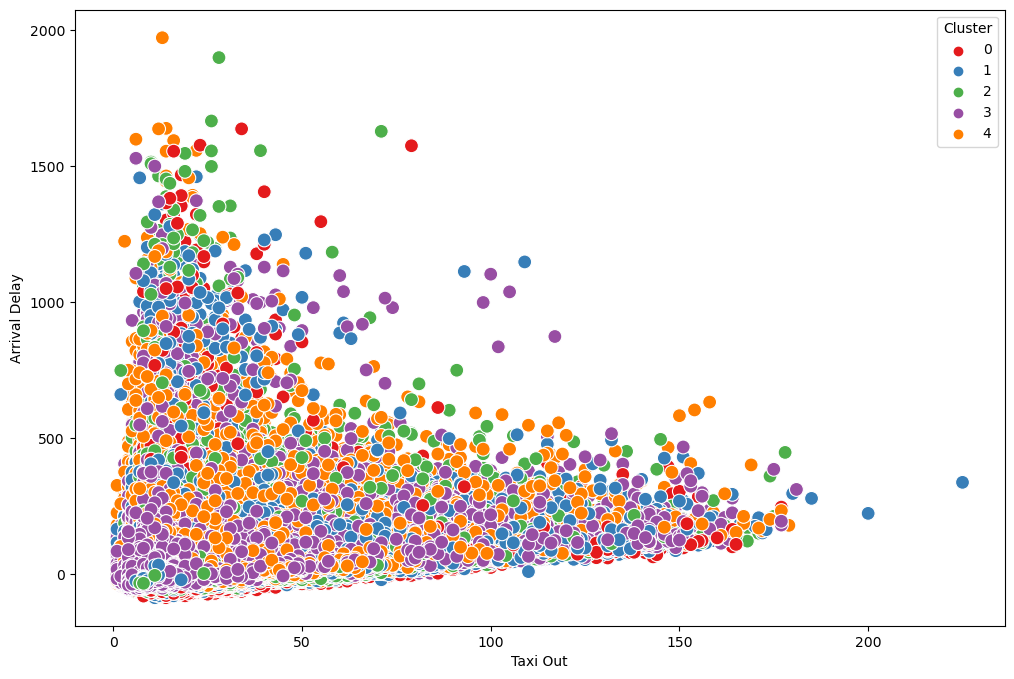

In [23]:
# Plot the clusters for the "Taxi Out" and "Arrival Delay" variables.
plt.figure(figsize=(12, 8))

# Define a color palette for the clusters
cluster_palette = sns.color_palette("Set1", n_colors=len(df_cluster['CLUSTERS'].unique()))

ax = sns.scatterplot(
    x=df_cluster['TAXI_OUT'],
    y=df_cluster['ARRIVAL_DELAY'],
    hue=df_cluster['CLUSTERS'], 
    palette=cluster_palette,
    s=100
)

ax.grid(False)
plt.xlabel('Taxi Out')
plt.ylabel('Arrival Delay')
plt.legend(title='Cluster')
plt.show()

This scatterplot has the arrival delay and the taxi out time variables. The pattern here does not appear to be as clear as the previous graph. The orrange and blue flights again seem to be clustered clost together with less varience than the other clusters. There is clearly a lot of overlap occuring on this graph which makes it more difficult to identify patterns. 

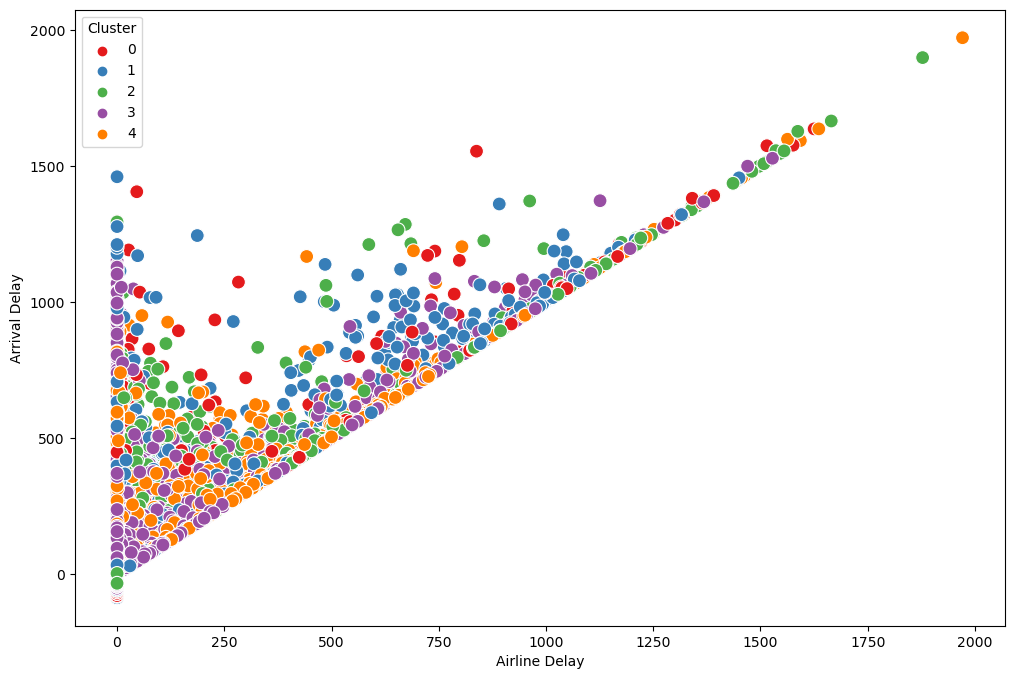

In [24]:
# Plot the clusters for the "Airline Delay" and "Arrival Delay" variables.
plt.figure(figsize=(12, 8))

# Define a color palette for the clusters
cluster_palette = sns.color_palette("Set1", n_colors=len(df_cluster['CLUSTERS'].unique()))

ax = sns.scatterplot(
    x=df_cluster['AIRLINE_DELAY'],
    y=df_cluster['ARRIVAL_DELAY'],
    hue=df_cluster['CLUSTERS'], 
    palette=cluster_palette,
    s=100
)

ax.grid(False)
plt.xlabel('Airline Delay')
plt.ylabel('Arrival Delay')
plt.legend(title='Cluster')
plt.show()

In our final we can see a group of green clustered flights in the center of the plot representing flights with higher arrival delays and medium airline delays. Once again the orange and blue flights were clustered towards the bottom left of the graph again indicating they are the shorter flights with less delay.   

### Cluster Statistics

In [25]:
# Cluster statistics for each variable
df_cluster.groupby('cluster').agg({'ARRIVAL_DELAY':['mean', 'median'], 
                         'DEPARTURE_DELAY':['mean', 'median'], 
                         'TAXI_OUT':['mean', 'median'],
                          'SCHEDULED_TIME':['mean', 'median'],
                           'ELAPSED_TIME':['mean', 'median'],
                           'AIR_TIME':['mean', 'median'],
                           'DISTANCE':['mean', 'median'],
                           'TAXI_IN':['mean', 'median'],
                           'AIR_SYSTEM_DELAY':['mean', 'median'],
                           'SECURITY_DELAY':['mean', 'median'],
                           'AIRLINE_DELAY':['mean', 'median'],
                           'LATE_AIRCRAFT_DELAY':['mean', 'median'],
                           'WEATHER_DELAY':['mean', 'median']})

ARRIVAL_DELAY        DEPARTURE_DELAY          TAXI_OUT         \
                 mean median            mean median       mean median   
cluster                                                                 
blue         8.914971   -3.0       15.140619    0.0  16.104331   14.0   
green       -0.165290   -7.0        5.944959   -2.0  16.128611   14.0   
orange       1.578885   -6.0        5.133959   -3.0  15.732646   14.0   
purple       8.575260   -3.0       12.138909   -1.0  15.754035   14.0   
red          1.598162   -6.0       10.374966    0.0  18.010644   16.0   

        SCHEDULED_TIME        ELAPSED_TIME           AIR_TIME         \
                  mean median         mean median        mean median   
cluster                                                                
blue        176.837951  169.0   170.612301  163.0  146.867795  139.0   
green       184.796585  176.0   178.686336  170.0  154.726436  146.0   
orange       94.023906   93.0    90.468832   89.0   67.563908   66.0   
purple       91.094572   90.0    87.530923   86.0   64.748179   63.0   
red         318.863208  317.0   310.086404  307.0  283.677408  281.0   

            DISTANCE           TAXI_IN        AIR_SYSTEM_DELAY         \
                mean  median      mean median             mean median   
cluster                                                                 
blue     1097.941329  1023.0  7.640175    6.0         3.365422    0.0   
green    1171.152668  1084.0  7.831289    6.0         2.116304    0.0   
orange    432.489278   421.0  7.172277    6.0         2.028738    0.0   
purple    413.998778   405.0  7.028710    6.0         2.729140    0.0   
red      2289.846521  2311.0  8.398352    7.0         2.624433    0.0   

        SECURITY_DELAY        AIRLINE_DELAY        LATE_AIRCRAFT_DELAY         \
                  mean median          mean median                mean median   
cluster                                                                         
blue          0.019231    0.0      4.315052    0.0            6.788642    0.0   
green         0.014607    0.0      3.401609    0.0            2.044600    0.0   
orange        0.009871    0.0      3.064806    0.0            2.485429    0.0   
purple        0.013244    0.0      3.484654    0.0            6.742791    0.0   
red           0.021685    0.0      4.050321    0.0            3.487664    0.0   

        WEATHER_DELAY         
                 mean median  
cluster                       
blue         0.705664    0.0  
green        0.384505    0.0  
orange       0.454013    0.0  
purple       0.658976    0.0  
red          0.483830    0.0

By examining the mean and median for our variables for each cluster we can see some patterns and among them that distinguish them from each other. Below are some profiles we can identify for each cluster.
<br> Purple - longest flights among the groups, highest rate of security delay and longest taxi time.
<br> Blue - shortest flights with orange, least departure delay
<br> Orange - shortest flights with blue, longest arrival delay with green, second highest late aircraft and weather delay
<br> Green - longest arrival and departure delay, medium length flights, highest airline, late aircraft and weather delay
<br> Red - shortest delays among all clusters, medium lenght flights

In [26]:
# export dataset
df_cluster.to_pickle(os.path.join(path, '01 Data', 'clusters.pkl'))